In [1]:
!python -V

Python 3.7.12


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.activations import relu, tanh, sigmoid, softmax

In [2]:
crop_data = pd.read_csv('DataPenanaman_Blitar_final4.csv')
crop_data.head()

,temperature,rainfall,humidity,ph,label
0,29.339459,206.984528,54.565488,6.440599,Bawang Merah
1,29.185989,212.041608,52.325820,5.775009,Bawang Merah
2,28.768153,213.424212,51.666718,6.005796,Bawang Merah
3,28.753504,200.296884,53.445952,5.671608,Bawang Merah
4,29.363078,230.195211,53.027313,5.605439,Bawang Merah


In [3]:
crop_data.describe()

,temperature,rainfall,humidity,ph
count,1700.000000,1700.000000,1700.000000,1700.000000
mean,25.089096,162.300688,76.307231,6.303170
std,3.763469,48.025602,26.619831,0.537579
min,15.043895,40.015009,25.081141,5.009140
25%,22.871029,141.241955,65.873899,5.945950
50%,25.809315,166.384724,74.784783,6.313267
75%,27.777018,194.656959,83.038048,6.686703
max,32.976644,259.861522,189.917246,7.929761


In [4]:
crop_data['label'].unique()

array(['Bawang Merah', 'Cabai Besar', 'Melon', 'Cabai Rawit', 'Tomat',
       'Kentang', 'Kubis', 'Kopi', 'Padi', 'Jagung', 'Pisang', 'mangga',
       'anggur', 'Semangka', 'Apel', 'Jeruk', 'Pepaya'], dtype=object)

In [5]:
crop_data.isnull().sum()

temperature    0
rainfall       0
humidity       0
ph             0
label          0
dtype: int64

C:\Users\hagan\AppData\Local\Temp\ipykernel_30508\1818211992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crop_data.corr(), annot=True)


<AxesSubplot:>

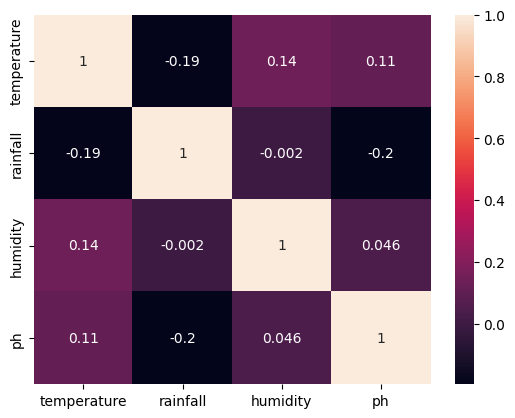

In [6]:
sns.heatmap(crop_data.corr(), annot=True)

See that Phosporus (P) has relatively high correlation with Potassium (K).

In [7]:
print('There are {} unique labels for crop recommendation dataset'.format(len(crop_data['label'].unique())))

There are 17 unique labels for crop recommendation dataset


<AxesSubplot:>

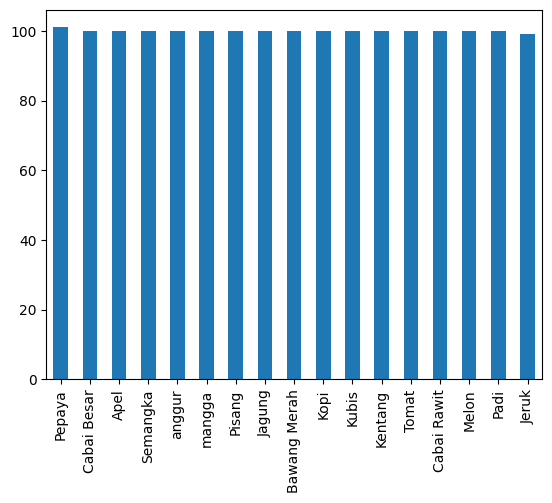

In [8]:
# Distribution of Crop Recommendation Dataset's Label
crop_data['label'].value_counts().plot(kind='bar')

## Temperature, Humidity, Ph, Rainfall

C:\Users\hagan\AppData\Local\Temp\ipykernel_30508\3105890195.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_data[column_th], ax=axs2[i])
C:\Users\hagan\AppData\Local\Temp\ipykernel_30508\3105890195.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_data[column_th], ax=axs2[i])
C:

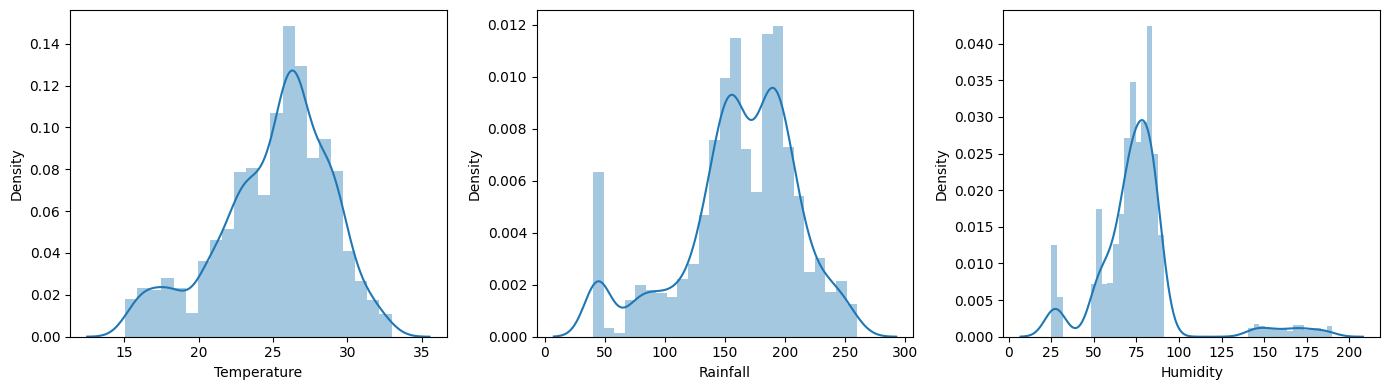

In [9]:
fig2, axs2 = plt.subplots(1, 3, figsize=(14,4))
for i in range(3):
    column_th = crop_data.columns[i]
    sns.distplot(crop_data[column_th], ax=axs2[i])
    axs2[i].set_xlabel(column_th.capitalize())
plt.tight_layout()
plt.show()

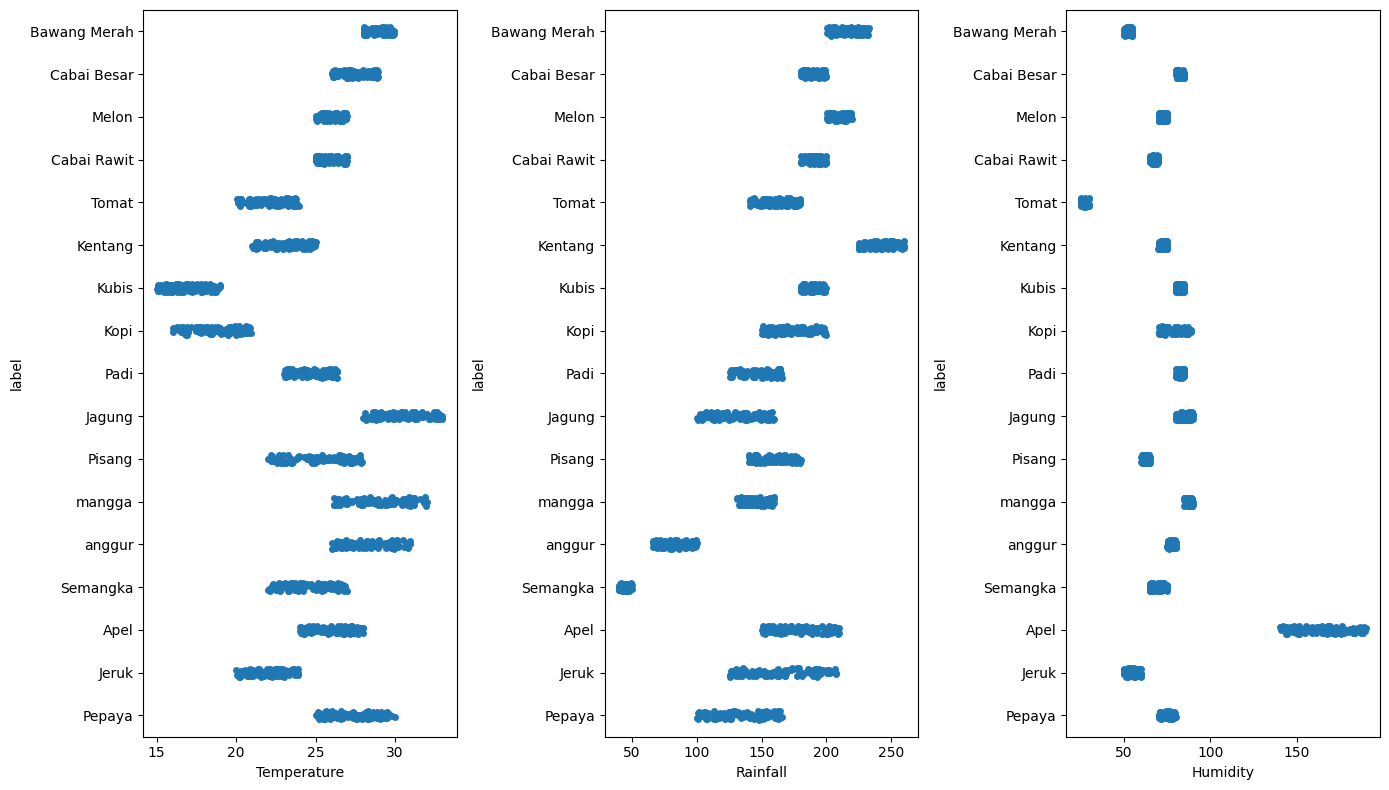

In [10]:
fig3, axs3 = plt.subplots(1, 3, figsize=(14,8))
for i in range(3):
    column_th = crop_data.columns[i]
    sns.stripplot(x=crop_data[column_th], y=crop_data['label'], ax=axs3[i])
    axs3[i].set_xlabel(column_th.capitalize())
plt.tight_layout()
plt.show()

## Selected data


In [11]:
blitar_data = pd.read_csv('DataPenanaman_Blitar_final3.csv')
blitar_data.head()

,temperature,rainfall,humidity,ph,label
0,29.339459,206.984528,54.565488,6.440599,Bawang Merah
1,29.185989,212.041608,52.325820,5.775009,Bawang Merah
2,28.768153,213.424212,51.666718,6.005796,Bawang Merah
3,28.753504,200.296884,53.445952,5.671608,Bawang Merah
4,29.363078,230.195211,53.027313,5.605439,Bawang Merah


In [12]:
# List kolom yang ingin dihapus
columns_to_remove = ['ph']

# Menghapus kolom-kolom tersebut
blitar_data = blitar_data.drop(columns=columns_to_remove)
blitar_data

,temperature,rainfall,humidity,label
0,29.339459,206.984528,54.565488,Bawang Merah
1,29.185989,212.041608,52.325820,Bawang Merah
2,28.768153,213.424212,51.666718,Bawang Merah
3,28.753504,200.296884,53.445952,Bawang Merah
4,29.363078,230.195211,53.027313,Bawang Merah
...,...,...,...,...
1695,27.383648,123.798017,75.971405,Pepaya
1696,25.255390,152.180714,75.163506,Pepaya
1697,28.860612,100.334737,75.961851,Pepaya
1698,29.497927,112.468887,77.487554,Pepaya


In [13]:
# Membagi kolom "rainfall" dengan 10
crop_data = blitar_data
crop_data['rainfall'] = crop_data['rainfall'] / 10

In [14]:
crop_data.describe()

,temperature,rainfall,humidity
count,1700.000000,1700.000000,1700.000000
mean,25.042889,16.415617,71.679935
std,3.874022,4.788514,14.855088
min,15.043895,4.001501,25.081141
25%,22.663841,14.195422,66.706478
50%,25.712142,17.165297,75.655582
75%,27.853056,19.513050,81.925027
max,34.969389,25.986152,89.966008


In [15]:
crop_data['label'].unique()

array(['Bawang Merah', 'Cabai Besar', 'Melon', 'Cabai Rawit', 'Tomat',
       'Kentang', 'Kubis', 'Kopi', 'Padi', 'Jagung', 'Pisang', 'mangga',
       'anggur', 'Semangka', 'Apel', 'Jeruk', 'Pepaya'], dtype=object)

## Build the Model

In [16]:
X = crop_data
y = X.pop('label')

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print('Num Label: ', y)
print('Word Label: ', le.inverse_transform(y))
# See the first 5 observations of X and y
# X.head()
# y.head()

Num Label:  [ 1  1  1 ... 11 11 11]
Word Label:  ['Bawang Merah' 'Bawang Merah' 'Bawang Merah' ... 'Pepaya' 'Pepaya'
 'Pepaya']


In [18]:
# Perform splitting training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=29)
print('Number of training data: ', X_train.shape[0])
print('Number of testing data: ', X_test.shape[0])

Number of training data:  1275
Number of testing data:  425


In [19]:
# Show first 5 data of training
X_train.head()

# Show first 5 data of testing
#X_test.head()

,temperature,rainfall,humidity
816,24.453223,14.940683,83.653680
1496,26.257261,17.852306,77.183278
228,26.343496,20.446810,70.608378
735,19.036500,18.100255,72.158338
1088,27.142858,14.088772,63.284236


In [20]:
X_test.head()

,temperature,rainfall,humidity
1019,25.046822,16.675293,63.304374
214,26.231094,20.402028,71.633598
1192,27.380215,13.799542,85.692130
1595,22.160893,14.051508,56.059157
1270,28.284237,7.399778,79.085360


In [21]:
# Perform feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Hyperparameter Tuning

In [22]:
#from keras.wrappers.scikit_learn import KerasClassifier
#from sklearn.model_selection import GridSearchCV

In [23]:
'''
def create_model(layers, activation):
    model = Sequential()
    for i, neurons in enumerate(layers):
        if i==0:
            model.add(Dense(neurons, input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(neurons))
            model.add(Activation(activation))
    model.add(Dense(22, activation='softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model
'''

#model = KerasClassifier(build_fn=create_model, verbose=0)

print('')

In [24]:
'''
layers = [[16, 32, 64], [32, 32, 64], [64, 64, 64]]
activations = ['relu', 'tanh']
param_grid = dict(layers=layers, activation=activations, batch_size=[32, 64], epochs=[70])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
'''

#grid_result = grid.fit(X_train, y_train)

#[grid_result.best_score_, grid_result.best_params_]

print('')

## table of loss function
Dense(32, activation='tanh'),Dense(32, activation='tanh'),Dense(32, activation='tanh') **smallest loss function loss=0.21**


In [47]:
model = Sequential([
    Flatten(),
    Dense(32, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(17, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [1]:
model.summary()

NameError: name 'model' is not defined

In [48]:
# Fitting the model
# Note: Change verbose to 1, to see fitting details per epoch

history = model.fit(X_train, y_train, epochs=290, validation_data=(X_test, y_test), batch_size=32, verbose = 1)

Epoch 1/290
40/40 [==============================] - 1s 8ms/step - loss: 2.2529 - accuracy: 0.3082 - val_loss: 1.7431 - val_accuracy: 0.4424
Epoch 2/290
40/40 [==============================] - 0s 5ms/step - loss: 1.4198 - accuracy: 0.5224 - val_loss: 1.2394 - val_accuracy: 0.5976
Epoch 3/290
40/40 [==============================] - 0s 4ms/step - loss: 1.0726 - accuracy: 0.6557 - val_loss: 1.0316 - val_accuracy: 0.7082
Epoch 4/290
40/40 [==============================] - 0s 5ms/step - loss: 0.9123 - accuracy: 0.7075 - val_loss: 0.8755 - val_accuracy: 0.7318
Epoch 5/290
40/40 [==============================] - 0s 4ms/step - loss: 0.7944 - accuracy: 0.7584 - val_loss: 0.7719 - val_accuracy: 0.7741
Epoch 6/290
40/40 [==============================] - 0s 5ms/step - loss: 0.7103 - accuracy: 0.7718 - val_loss: 0.6801 - val_accuracy: 0.7600
Epoch 7/290
40/40 [==============================] - 0s 5ms/step - loss: 0.6345 - accuracy: 0.7992 - val_loss: 0.6086 - val_accuracy: 0.8282
Epoch 8/290
4

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# List all metrics
metrics = [acc, val_acc, loss, val_loss]
names = ['Training Accuracy', 'Testing Accuracy', 'Training Loss', 'Testing Loss']

for i in range(len(metrics)):
    print ('Final {}: {:.3f}'.format(names[i], metrics[i][-1]))

Final Training Accuracy: 0.964
Final Testing Accuracy: 0.932
Final Training Loss: 0.090
Final Testing Loss: 0.165


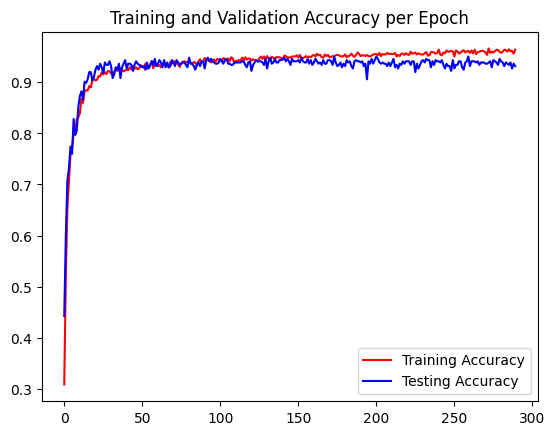

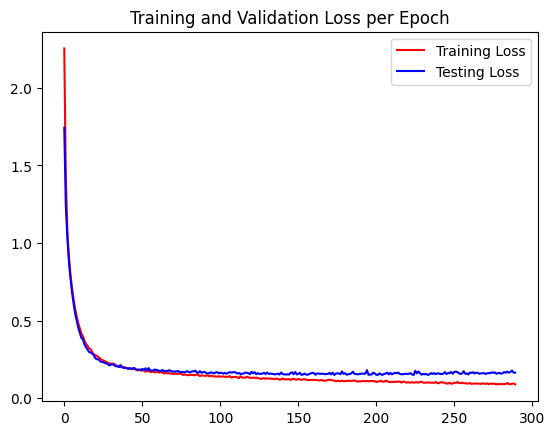

In [50]:
# Initialize x-axis and its naught value

epochs = range(len(acc))
start = 0 # Change 'start' variable to change the naught value
end = epochs[-1] + 1

# Plot training and validation accuracy per epoch
plt.plot(epochs[start:end], acc[start:end], 'r', label='Training Accuracy')
plt.plot(epochs[start:end], val_acc[start:end], 'b', label='Testing Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend(loc=0)
plt.show()

# Plot training and validation loss per epoch
plt.plot(epochs[start:end], loss[start:end], 'r', label='Training Loss')
plt.plot(epochs[start:end], val_loss[start:end], 'b', label='Testing Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend(loc=0)
plt.show()

save model

In [29]:
from keras.models import load_model

# Menyimpan model setelah melatihnya
model.save('recommendation_model_final4.h5')


load model

In [2]:
from keras.models import load_model

# Ganti 'nama_model.h5' dengan nama file dari model Anda
model = load_model('recommendation_model_final4.h5')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3)                 0         
                                                                 
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 17)                561       
                                                                 
Total params: 2,801
Trainable params: 2,801
Non-trainable params: 0
_________________________________________________________________


# DATA BARU

In [341]:
import pandas as pd
import numpy as np

# Muat data CSV ke dalam DataFrame
wates_final_data = pd.read_csv('data_modeling/final/mojorejo_final.csv')
wates_final_data


,YEAR,MO,DY,TS,RH2M,PRECTOTCORR
0,2022,11,5,25.09,90.38,4.15
1,2022,11,6,24.31,91.62,2.76
2,2022,11,7,25.30,85.38,5.08
3,2022,11,8,25.00,86.56,22.70
4,2022,11,9,24.40,89.44,22.31
...,...,...,...,...,...,...
360,2023,10,31,30.86,65.75,1.17
361,2023,11,1,30.51,66.12,0.79
362,2023,11,2,30.48,66.75,1.32
363,2023,11,3,29.96,72.81,7.40


In [342]:
# List kolom yang ingin dihapus
columns_to_remove = ['YEAR', 'MO', 'DY']

# Menghapus kolom-kolom tersebut
wates_final = wates_final_data.drop(columns=columns_to_remove)
wates_final

,TS,RH2M,PRECTOTCORR
0,25.09,90.38,4.15
1,24.31,91.62,2.76
2,25.30,85.38,5.08
3,25.00,86.56,22.70
4,24.40,89.44,22.31
...,...,...,...
360,30.86,65.75,1.17
361,30.51,66.12,0.79
362,30.48,66.75,1.32
363,29.96,72.81,7.40


In [343]:
wates_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TS           365 non-null    float64
 1   RH2M         365 non-null    float64
 2   PRECTOTCORR  365 non-null    float64
dtypes: float64(3)
memory usage: 8.7 KB


## Only Sort Output Based on Probability

In [344]:
# Prediction only applied for Scalable Data
def scaled_predict(inputs, threshold=0.1):
    
    counter = 0
    
    # Get all probabilities for each label
    y_pred = model.predict(inputs)
    
    # Insert corresponding label to labels list
    for probs in y_pred:
        counter += 1
        
        # List of labels that transcend some threshold
        index = np.where(probs > threshold)[0]
        print('Recommendation {}: {}'.format(counter, ', '.join(le.inverse_transform(index))))
        
# Prediction only applied before data scalable        
def predict(inputs, threshold=0.1):
    
    # Feature Scaling by StandardScaler
    inputs = sc.transform(inputs)
    
    # Use scaled_predict function
    scaled_predict(inputs, threshold)

In [345]:
scaled_predict(wates_final)

12/12 [==============================] - 0s 1ms/step
Recommendation 1: Kentang
Recommendation 2: Kentang
Recommendation 3: Kentang
Recommendation 4: Apel
Recommendation 5: Apel
Recommendation 6: Kentang
Recommendation 7: Apel
Recommendation 8: Apel, Kentang
Recommendation 9: Kentang
Recommendation 10: Kentang
Recommendation 11: Apel
Recommendation 12: Apel
Recommendation 13: Kentang
Recommendation 14: Apel
Recommendation 15: Apel
Recommendation 16: Apel
Recommendation 17: Apel
Recommendation 18: Apel
Recommendation 19: Apel
Recommendation 20: Apel
Recommendation 21: Apel
Recommendation 22: Apel
Recommendation 23: Apel
Recommendation 24: Apel
Recommendation 25: Apel
Recommendation 26: Apel
Recommendation 27: Apel
Recommendation 28: Apel
Recommendation 29: Kentang
Recommendation 30: Apel, Kentang
Recommendation 31: Apel, Kentang
Recommendation 32: Kentang
Recommendation 33: Kentang
Recommendation 34: Kentang
Recommendation 35: Apel
Recommendation 36: Kentang
Recommendation 37: Kentang
Re

## Sorting Probabilities and Corresponding Index

In [346]:
# Prediction only applied for Scalable Data
def scaled_predict(inputs):
    
    counter = 0
    
    # Get all probabilities for each label
    y_pred = model.predict(inputs)
    
    # Insert corresponding label to labels list
    for probs in y_pred:
        counter += 1 
        
        index = [i for i in range(len(probs))]
        
        # Sorted probs (descending)
        sorted_probs = list(np.sort(probs)[::-1])
        
        # Convert np.array probs to list
        probs = list(probs)
        
        # Indexes after sorted by probs
        sorted_index = [probs.index(prob) for prob in sorted_probs]
        
        print('Recommendation {}: {}'.format(counter, ', '.join(le.inverse_transform(sorted_index))))
        print('Probabilities: {}'.format(sorted_probs))
        print('')
        
# Prediction only applied before data scalable        
def predict(inputs, threshold=0.1):
    
    # Feature Scaling by StandardScaler
    inputs = sc.transform(inputs)
    
    # Use scaled_predict function
    scaled_predict(inputs, threshold)

In [347]:
# Test it for yourself

scaled_predict(wates_final)

12/12 [==============================] - 0s 1ms/step
Recommendation 1: Kentang, Melon, Apel, Cabai Besar, Bawang Merah, Jagung, Kopi, Kubis, Pepaya, Cabai Rawit, Pisang, Tomat, mangga, Padi, Jeruk, anggur, Semangka
Probabilities: [0.99999, 9.325478e-06, 6.5980544e-07, 6.456361e-08, 7.185518e-09, 3.7948578e-10, 2.5944163e-10, 2.43861e-10, 1.05740805e-10, 1.1254691e-11, 9.967909e-12, 8.6652387e-13, 3.195348e-13, 1.07311004e-13, 3.10848e-15, 1.5051743e-18, 2.239829e-27]

Recommendation 2: Kentang, Melon, Apel, Cabai Besar, Bawang Merah, Kopi, Jagung, Kubis, Pepaya, Pisang, Cabai Rawit, Tomat, mangga, Padi, Jeruk, anggur, Semangka
Probabilities: [0.9999949, 4.9859646e-06, 8.518863e-08, 8.4283345e-09, 1.9381454e-09, 4.394313e-11, 3.7119117e-11, 3.3437378e-11, 1.9664133e-11, 3.7511903e-12, 2.8461014e-12, 2.2309617e-13, 3.683118e-14, 1.6749965e-14, 1.0358e-15, 2.0336412e-19, 3.06623e-28]

Recommendation 3: Kentang, Apel, Melon, Cabai Besar, Jagung, Bawang Merah, Kopi, Pepaya, Kubis, Cabai Raw

BARU

In [348]:
# import pandas as pd
# import numpy as np

# # Inisialisasi data kosong untuk hasil prediksi dan probabilitas
# top_recommendations = []
# top_probabilities = []

# # Fungsi scaled_predict yang mengumpulkan hasil prediksi dan probabilitas 5 teratas ke dalam list
# def scaled_predict(inputs):
#     # ... (kode lainnya tetap sama)
#     counter = 0
    
#     # Get all probabilities for each label
#     y_pred = model.predict(inputs)
    
#     for probs in y_pred:
#         index = [i for i in range(len(probs))]
        
#         # Sorted probs (descending)
#         sorted_probs = list(np.sort(probs)[::-1])
        
#         # Convert np.array probs to list
#         probs = list(probs)
        
#         # Indexes after sorted by probs
#         sorted_index = [probs.index(prob) for prob in sorted_probs]
        
#         # Tambahkan hasil prediksi dan probabilitas 5 teratas ke dalam list
#         top_recommendations.append(', '.join(le.inverse_transform(sorted_index[:5])))
#         top_probabilities.append(sorted_probs[:5])

# # Fungsi predict yang menggunakan scaled_predict function
# def predict(inputs):
#     # Feature Scaling by StandardScaler
#     inputs = sc.transform(inputs)
    
#     # Panggil scaled_predict function
#     scaled_predict(inputs)

# # Contoh penggunaan
# # Misalnya, Anda memiliki data yang akan diprediksi
# input_data = wates_final

# # Panggil fungsi predict untuk mendapatkan hasil prediksi dan probabilitas 5 teratas
# scaled_predict(input_data)

# # Membuat DataFrame dari hasil prediksi dan probabilitas 5 teratas
# result_df = pd.DataFrame({'Top 5 Recommendations': top_recommendations, 'Top 5 Probabilities': top_probabilities})

# # Menyimpan DataFrame ke dalam file CSV
# result_df.to_csv('hasil_prediksi_top_5.csv', index=False)


save model with dataset 

In [349]:
import numpy as np

# Prediction only applied for Scalable Data
def scaled_predict(inputs):
    
    counter = 0
    
    # Get all probabilities for each label
    y_pred = model.predict(inputs)
    
    # Insert corresponding label to labels list
    for probs in y_pred:
        counter += 1 
        
        index = [i for i in range(len(probs))]
        
        # Sorted probs (descending)
        sorted_probs = list(np.sort(probs)[::-1])
        
        # Convert np.array probs to list
        probs = list(probs)
        
        # Indexes after sorted by probs
        sorted_index = [probs.index(prob) for prob in sorted_probs]
        
        print('Recommendation {}: {}'.format(counter, ', '.join(le.inverse_transform(sorted_index))))
        print('Probabilities: {}'.format(sorted_probs))
        print('')
        
def scaled_predict(inputs, threshold=0.1):
    predictions = []
    probabilities = []
    counter = 0
    
    # Get all probabilities for each label
    y_pred = model.predict(inputs)

    # Insert corresponding label to labels list
    for probs in y_pred:
        index = [i for i in range(len(probs))]

        # Sorted probs (descending)
        sorted_probs = list(np.sort(probs)[::-1])

        # Convert np.array probs to list
        probs = list(probs)

        # Indexes after sorted by probs
        sorted_index = [probs.index(prob) for prob in sorted_probs]

        # Append top 5 predictions and probabilities to lists
        top_5_labels = le.inverse_transform(sorted_index[:5])
        top_5_probs = sorted_probs[:5]

        predictions.append(top_5_labels)
        probabilities.append(top_5_probs)

    return predictions, probabilities

# Prediction only applied before data scalable
def predict(inputs, threshold=0.1):
    # Feature Scaling by StandardScaler
    inputs = sc.transform(inputs)

    # Use scaled_predict function
    predictions, probabilities = scaled_predict(inputs, threshold)
    return predictions, probabilities

def predict(inputs, threshold=0.1):
    
    # Feature Scaling by StandardScaler
    inputs = sc.transform(inputs)
    
    # Use scaled_predict function
    scaled_predict(inputs, threshold)
    

# Example usage:
# Assuming you have your dataset named 'your_dataset' and you want to add predictions to it
input_data = wates_final  # Replace this with your input data
predicted_labels, predicted_probs = scaled_predict(input_data)

# Add predicted labels and probabilities to your dataset
for i in range(len(wates_final)):
    wates_final.loc[i, 'Top 5 Predictions'] = ', '.join(predicted_labels[i])
    wates_final.loc[i, 'Top 5 Probabilities'] = str(predicted_probs[i])


 1/12 [=>............................] - ETA: 0s12/12 [==============================] - 0s 2ms/step


In [350]:
import pandas as pd

# Menggabungkan hasil prediksi dengan dataset asli
wates_final_data['Top 5 Predictions'] = predicted_labels
wates_final_data['Top 5 Probabilities'] = predicted_probs

# Menyimpan dataset baru yang sudah diperbarui ke dalam file CSV
wates_final_data.to_csv('data_modeling/final/mojorejo_probabilities.csv', index=False)  # Ganti 'hasil_prediksi.csv' sesuai dengan nama file yang Anda inginkan


In [351]:
import pandas as pd

# Misalkan predicted_labels dan predicted_probs adalah hasil prediksi dan probabilitas yang Anda miliki
wates_final_data = pd.read_csv('data_modeling/final/mojorejo_final.csv')
# Contoh data hasil prediksi dan probabilitas
data_prediksi = {
    'Top 5 Predictions': predicted_labels,
    'Top 5 Probabilities': predicted_probs
}

# Membuat DataFrame baru dari hasil prediksi dan probabilitas
df_hasil = pd.DataFrame(data_prediksi)

# Membuat DataFrame baru untuk hasil prediksi yang telah dipisahkan
df_prediksi = pd.DataFrame(df_hasil['Top 5 Predictions'].values.tolist(), columns=[f'Top Prediction {i+1}' for i in range(5)])

# Membuat DataFrame baru untuk hasil probabilitas yang telah dipisahkan
df_probabilitas = pd.DataFrame(df_hasil['Top 5 Probabilities'].values.tolist(), columns=[f'Probability {i+1}' for i in range(5)])

# Menggabungkan DataFrame hasil prediksi dan probabilitas yang telah dipisahkan
df_final = pd.concat([wates_final_data, df_prediksi, df_probabilitas], axis=1)
df_final_predict = pd.concat([df_prediksi, df_probabilitas], axis=1)

# Menyimpan DataFrame hasil prediksi dan probabilitas yang sudah dipisahkan ke dalam file CSV
df_final.to_csv('data_modeling/final/mojorejo_result_prediction_probabilitas.csv', index=False)
df_final_predict.to_csv('data_modeling/final/mojorejo_probabilities_separately.csv', index=False)

